In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading the dataset

df = pd.read_csv('heart.csv',delimiter= ',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#we can infer that this dataset has no null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


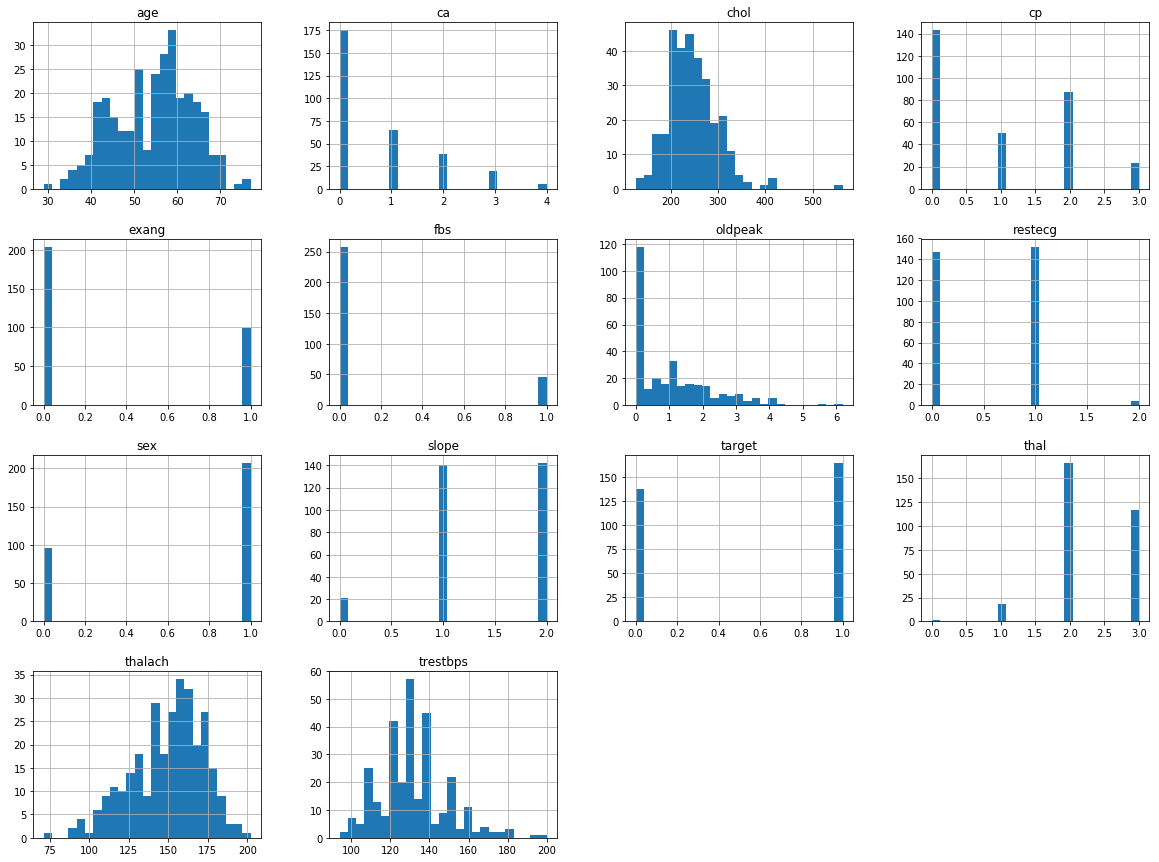

In [6]:
df.hist(bins =25, figsize=(20,15))
plt.show()

In [7]:
corr_matrix = df.corr()

corr_matrix["target"].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

In [8]:
df = df.drop(["fbs","chol"], axis = 1 )

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df,test_size = 0.2 , random_state=4)

In [10]:
train_y = train_set["target"]
train_set = train_set.drop("target", axis =1)

test_y = test_set["target"]
test_set = test_set.drop("target", axis =1)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
train_X = scaler1.fit_transform(train_set)
test_X = scaler1.fit_transform(test_set)

In [12]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(n_estimators =1000)
random_forest_clf.fit(train_X, train_y)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
from sklearn.metrics import accuracy_score

train_preds = random_forest_clf.predict(train_X)
train_acc = accuracy_score(train_y,train_preds)
print(train_acc)

1.0


In [14]:
test_preds = random_forest_clf.predict(test_X)
test_acc = accuracy_score(test_y,test_preds)
print(test_acc)

0.8524590163934426


In [15]:
from keras.utils import to_categorical
y_binary = to_categorical(train_y)

Using TensorFlow backend.


In [16]:
from keras.models import Sequential
from keras.layers import Activation, Dropout
from keras.layers.core import Dense
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Dense(12,input_shape=(11,),activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=SGD(lr=0.005), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_y , epochs = 2000, validation_split = 0.2 )

Train on 193 samples, validate on 49 samples
Epoch 1/2000
193/193 [==============================] - 0s 940us/step - loss: 0.9937 - acc: 0.5181 - val_loss: 1.1327 - val_acc: 0.4694
Epoch 2/2000
193/193 [==============================] - 0s 58us/step - loss: 0.9776 - acc: 0.5285 - val_loss: 1.0706 - val_acc: 0.4490
Epoch 3/2000
193/193 [==============================] - 0s 57us/step - loss: 0.9675 - acc: 0.4508 - val_loss: 1.0443 - val_acc: 0.4490
Epoch 4/2000
193/193 [==============================] - 0s 73us/step - loss: 0.9928 - acc: 0.5026 - val_loss: 1.0100 - val_acc: 0.4286
Epoch 5/2000
193/193 [==============================] - 0s 59us/step - loss: 0.8930 - acc: 0.5026 - val_loss: 0.9590 - val_acc: 0.4286
Epoch 6/2000
193/193 [==============================] - 0s 56us/step - loss: 0.8619 - acc: 0.4870 - val_loss: 0.9256 - val_acc: 0.4286
Epoch 7/2000
193/193 [==============================] - 0s 56us/step - loss: 0.8396 - acc: 0.5233 - val_loss: 0.9029 - val_acc: 0.4286
Epoch 8/2

Epoch 61/2000
193/193 [==============================] - 0s 57us/step - loss: 0.6271 - acc: 0.6943 - val_loss: 0.6553 - val_acc: 0.6735
Epoch 62/2000
193/193 [==============================] - 0s 53us/step - loss: 0.6418 - acc: 0.6166 - val_loss: 0.6536 - val_acc: 0.6735
Epoch 63/2000
193/193 [==============================] - 0s 61us/step - loss: 0.6133 - acc: 0.6477 - val_loss: 0.6521 - val_acc: 0.6735
Epoch 64/2000
193/193 [==============================] - 0s 52us/step - loss: 0.6474 - acc: 0.5544 - val_loss: 0.6500 - val_acc: 0.6735
Epoch 65/2000
193/193 [==============================] - 0s 66us/step - loss: 0.6249 - acc: 0.6373 - val_loss: 0.6475 - val_acc: 0.6735
Epoch 66/2000
193/193 [==============================] - 0s 51us/step - loss: 0.6598 - acc: 0.5855 - val_loss: 0.6460 - val_acc: 0.6735
Epoch 67/2000
193/193 [==============================] - 0s 52us/step - loss: 0.6495 - acc: 0.5907 - val_loss: 0.6454 - val_acc: 0.6735
Epoch 68/2000
193/193 [=========================

193/193 [==============================] - 0s 58us/step - loss: 0.6143 - acc: 0.6477 - val_loss: 0.5674 - val_acc: 0.7347
Epoch 122/2000
193/193 [==============================] - 0s 54us/step - loss: 0.5581 - acc: 0.6839 - val_loss: 0.5665 - val_acc: 0.7143
Epoch 123/2000
193/193 [==============================] - 0s 50us/step - loss: 0.6146 - acc: 0.6321 - val_loss: 0.5647 - val_acc: 0.7143
Epoch 124/2000
193/193 [==============================] - 0s 57us/step - loss: 0.5830 - acc: 0.6891 - val_loss: 0.5648 - val_acc: 0.7143
Epoch 125/2000
193/193 [==============================] - 0s 52us/step - loss: 0.5923 - acc: 0.6580 - val_loss: 0.5627 - val_acc: 0.7143
Epoch 126/2000
193/193 [==============================] - 0s 55us/step - loss: 0.5930 - acc: 0.6321 - val_loss: 0.5644 - val_acc: 0.7143
Epoch 127/2000
193/193 [==============================] - 0s 54us/step - loss: 0.5599 - acc: 0.6788 - val_loss: 0.5639 - val_acc: 0.7143
Epoch 128/2000
193/193 [==============================] 

Epoch 181/2000
193/193 [==============================] - 0s 59us/step - loss: 0.5533 - acc: 0.7098 - val_loss: 0.5198 - val_acc: 0.7347
Epoch 182/2000
193/193 [==============================] - 0s 48us/step - loss: 0.5488 - acc: 0.7047 - val_loss: 0.5191 - val_acc: 0.7347
Epoch 183/2000
193/193 [==============================] - 0s 47us/step - loss: 0.5107 - acc: 0.7358 - val_loss: 0.5186 - val_acc: 0.7347
Epoch 184/2000
193/193 [==============================] - 0s 53us/step - loss: 0.5257 - acc: 0.6995 - val_loss: 0.5183 - val_acc: 0.7347
Epoch 185/2000
193/193 [==============================] - 0s 49us/step - loss: 0.5331 - acc: 0.7202 - val_loss: 0.5178 - val_acc: 0.7347
Epoch 186/2000
193/193 [==============================] - 0s 48us/step - loss: 0.5265 - acc: 0.7409 - val_loss: 0.5169 - val_acc: 0.7347
Epoch 187/2000
193/193 [==============================] - 0s 50us/step - loss: 0.5193 - acc: 0.7047 - val_loss: 0.5161 - val_acc: 0.7347
Epoch 188/2000
193/193 [=================

Epoch 241/2000
193/193 [==============================] - 0s 55us/step - loss: 0.4912 - acc: 0.7513 - val_loss: 0.4882 - val_acc: 0.7551
Epoch 242/2000
193/193 [==============================] - 0s 49us/step - loss: 0.5077 - acc: 0.7306 - val_loss: 0.4879 - val_acc: 0.7551
Epoch 243/2000
193/193 [==============================] - 0s 53us/step - loss: 0.5185 - acc: 0.7150 - val_loss: 0.4870 - val_acc: 0.7551
Epoch 244/2000
193/193 [==============================] - 0s 54us/step - loss: 0.5288 - acc: 0.6788 - val_loss: 0.4865 - val_acc: 0.7551
Epoch 245/2000
193/193 [==============================] - 0s 54us/step - loss: 0.4865 - acc: 0.7668 - val_loss: 0.4866 - val_acc: 0.7551
Epoch 246/2000
193/193 [==============================] - 0s 49us/step - loss: 0.4757 - acc: 0.7306 - val_loss: 0.4860 - val_acc: 0.7551
Epoch 247/2000
193/193 [==============================] - 0s 56us/step - loss: 0.5034 - acc: 0.6995 - val_loss: 0.4858 - val_acc: 0.7551
Epoch 248/2000
193/193 [=================

Epoch 301/2000
193/193 [==============================] - 0s 60us/step - loss: 0.5058 - acc: 0.7565 - val_loss: 0.4646 - val_acc: 0.8163
Epoch 302/2000
193/193 [==============================] - 0s 57us/step - loss: 0.4750 - acc: 0.7409 - val_loss: 0.4634 - val_acc: 0.8163
Epoch 303/2000
193/193 [==============================] - 0s 55us/step - loss: 0.4732 - acc: 0.7461 - val_loss: 0.4625 - val_acc: 0.8163
Epoch 304/2000
193/193 [==============================] - 0s 47us/step - loss: 0.4777 - acc: 0.7617 - val_loss: 0.4615 - val_acc: 0.8163
Epoch 305/2000
193/193 [==============================] - 0s 50us/step - loss: 0.4910 - acc: 0.7513 - val_loss: 0.4634 - val_acc: 0.8163
Epoch 306/2000
193/193 [==============================] - 0s 55us/step - loss: 0.4820 - acc: 0.7202 - val_loss: 0.4630 - val_acc: 0.8163
Epoch 307/2000
193/193 [==============================] - 0s 51us/step - loss: 0.4841 - acc: 0.7513 - val_loss: 0.4619 - val_acc: 0.8163
Epoch 308/2000
193/193 [=================

Epoch 361/2000
193/193 [==============================] - 0s 51us/step - loss: 0.4771 - acc: 0.7565 - val_loss: 0.4440 - val_acc: 0.8163
Epoch 362/2000
193/193 [==============================] - 0s 45us/step - loss: 0.4719 - acc: 0.7565 - val_loss: 0.4433 - val_acc: 0.8163
Epoch 363/2000
193/193 [==============================] - 0s 52us/step - loss: 0.4778 - acc: 0.7306 - val_loss: 0.4433 - val_acc: 0.8163
Epoch 364/2000
193/193 [==============================] - 0s 52us/step - loss: 0.4580 - acc: 0.7876 - val_loss: 0.4429 - val_acc: 0.8163
Epoch 365/2000
193/193 [==============================] - 0s 49us/step - loss: 0.4440 - acc: 0.8187 - val_loss: 0.4430 - val_acc: 0.8163
Epoch 366/2000
193/193 [==============================] - 0s 54us/step - loss: 0.4826 - acc: 0.7358 - val_loss: 0.4420 - val_acc: 0.8367
Epoch 367/2000
193/193 [==============================] - 0s 66us/step - loss: 0.4868 - acc: 0.7565 - val_loss: 0.4419 - val_acc: 0.8367
Epoch 368/2000
193/193 [=================

Epoch 421/2000
193/193 [==============================] - 0s 61us/step - loss: 0.4146 - acc: 0.8031 - val_loss: 0.4316 - val_acc: 0.8163
Epoch 422/2000
193/193 [==============================] - 0s 58us/step - loss: 0.4856 - acc: 0.7306 - val_loss: 0.4343 - val_acc: 0.8163
Epoch 423/2000
193/193 [==============================] - 0s 48us/step - loss: 0.4838 - acc: 0.7720 - val_loss: 0.4343 - val_acc: 0.8163
Epoch 424/2000
193/193 [==============================] - 0s 59us/step - loss: 0.4624 - acc: 0.7358 - val_loss: 0.4339 - val_acc: 0.8163
Epoch 425/2000
193/193 [==============================] - 0s 53us/step - loss: 0.4320 - acc: 0.8135 - val_loss: 0.4342 - val_acc: 0.8163
Epoch 426/2000
193/193 [==============================] - 0s 48us/step - loss: 0.4500 - acc: 0.7565 - val_loss: 0.4333 - val_acc: 0.8163
Epoch 427/2000
193/193 [==============================] - 0s 61us/step - loss: 0.5000 - acc: 0.7047 - val_loss: 0.4335 - val_acc: 0.8163
Epoch 428/2000
193/193 [=================

Epoch 481/2000
193/193 [==============================] - 0s 58us/step - loss: 0.4306 - acc: 0.8031 - val_loss: 0.4252 - val_acc: 0.8163
Epoch 482/2000
193/193 [==============================] - 0s 49us/step - loss: 0.4689 - acc: 0.7565 - val_loss: 0.4251 - val_acc: 0.8163
Epoch 483/2000
193/193 [==============================] - 0s 48us/step - loss: 0.4475 - acc: 0.7927 - val_loss: 0.4254 - val_acc: 0.8163
Epoch 484/2000
193/193 [==============================] - 0s 53us/step - loss: 0.4574 - acc: 0.7358 - val_loss: 0.4250 - val_acc: 0.8163
Epoch 485/2000
193/193 [==============================] - 0s 46us/step - loss: 0.4385 - acc: 0.8031 - val_loss: 0.4247 - val_acc: 0.8163
Epoch 486/2000
193/193 [==============================] - 0s 50us/step - loss: 0.3994 - acc: 0.8135 - val_loss: 0.4248 - val_acc: 0.8163
Epoch 487/2000
193/193 [==============================] - 0s 51us/step - loss: 0.4582 - acc: 0.7617 - val_loss: 0.4242 - val_acc: 0.8163
Epoch 488/2000
193/193 [=================

Epoch 541/2000
193/193 [==============================] - 0s 51us/step - loss: 0.4215 - acc: 0.7824 - val_loss: 0.4218 - val_acc: 0.8163
Epoch 542/2000
193/193 [==============================] - 0s 51us/step - loss: 0.4557 - acc: 0.7979 - val_loss: 0.4221 - val_acc: 0.8163
Epoch 543/2000
193/193 [==============================] - 0s 50us/step - loss: 0.4767 - acc: 0.7513 - val_loss: 0.4223 - val_acc: 0.8163
Epoch 544/2000
193/193 [==============================] - 0s 48us/step - loss: 0.4441 - acc: 0.7876 - val_loss: 0.4224 - val_acc: 0.8163
Epoch 545/2000
193/193 [==============================] - 0s 46us/step - loss: 0.4545 - acc: 0.8342 - val_loss: 0.4225 - val_acc: 0.8163
Epoch 546/2000
193/193 [==============================] - 0s 51us/step - loss: 0.3884 - acc: 0.8394 - val_loss: 0.4221 - val_acc: 0.8163
Epoch 547/2000
193/193 [==============================] - 0s 46us/step - loss: 0.4521 - acc: 0.7876 - val_loss: 0.4221 - val_acc: 0.8163
Epoch 548/2000
193/193 [=================

Epoch 601/2000
193/193 [==============================] - 0s 48us/step - loss: 0.4307 - acc: 0.7876 - val_loss: 0.4255 - val_acc: 0.8163
Epoch 602/2000
193/193 [==============================] - 0s 51us/step - loss: 0.4637 - acc: 0.7565 - val_loss: 0.4253 - val_acc: 0.8163
Epoch 603/2000
193/193 [==============================] - 0s 52us/step - loss: 0.4668 - acc: 0.7720 - val_loss: 0.4251 - val_acc: 0.8163
Epoch 604/2000
193/193 [==============================] - 0s 45us/step - loss: 0.4255 - acc: 0.7824 - val_loss: 0.4252 - val_acc: 0.8163
Epoch 605/2000
193/193 [==============================] - 0s 53us/step - loss: 0.4211 - acc: 0.7824 - val_loss: 0.4227 - val_acc: 0.8163
Epoch 606/2000
193/193 [==============================] - 0s 46us/step - loss: 0.4517 - acc: 0.7720 - val_loss: 0.4232 - val_acc: 0.8163
Epoch 607/2000
193/193 [==============================] - 0s 48us/step - loss: 0.4504 - acc: 0.7772 - val_loss: 0.4232 - val_acc: 0.8163
Epoch 608/2000
193/193 [=================

Epoch 661/2000
193/193 [==============================] - 0s 48us/step - loss: 0.4626 - acc: 0.7668 - val_loss: 0.4115 - val_acc: 0.8163
Epoch 662/2000
193/193 [==============================] - 0s 49us/step - loss: 0.4141 - acc: 0.7979 - val_loss: 0.4115 - val_acc: 0.8163
Epoch 663/2000
193/193 [==============================] - 0s 52us/step - loss: 0.3811 - acc: 0.8187 - val_loss: 0.4116 - val_acc: 0.8163
Epoch 664/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3958 - acc: 0.8238 - val_loss: 0.4114 - val_acc: 0.8163
Epoch 665/2000
193/193 [==============================] - 0s 50us/step - loss: 0.4175 - acc: 0.7720 - val_loss: 0.4114 - val_acc: 0.8163
Epoch 666/2000
193/193 [==============================] - 0s 55us/step - loss: 0.3943 - acc: 0.8497 - val_loss: 0.4116 - val_acc: 0.8163
Epoch 667/2000
193/193 [==============================] - 0s 47us/step - loss: 0.3740 - acc: 0.8549 - val_loss: 0.4119 - val_acc: 0.8163
Epoch 668/2000
193/193 [=================

Epoch 721/2000
193/193 [==============================] - 0s 46us/step - loss: 0.3884 - acc: 0.8342 - val_loss: 0.4164 - val_acc: 0.8367
Epoch 722/2000
193/193 [==============================] - 0s 50us/step - loss: 0.4171 - acc: 0.8238 - val_loss: 0.4161 - val_acc: 0.8367
Epoch 723/2000
193/193 [==============================] - 0s 44us/step - loss: 0.4074 - acc: 0.8031 - val_loss: 0.4150 - val_acc: 0.8367
Epoch 724/2000
193/193 [==============================] - 0s 52us/step - loss: 0.4023 - acc: 0.8083 - val_loss: 0.4149 - val_acc: 0.8367
Epoch 725/2000
193/193 [==============================] - 0s 52us/step - loss: 0.3991 - acc: 0.8394 - val_loss: 0.4147 - val_acc: 0.8367
Epoch 726/2000
193/193 [==============================] - 0s 45us/step - loss: 0.4249 - acc: 0.8135 - val_loss: 0.4146 - val_acc: 0.8367
Epoch 727/2000
193/193 [==============================] - 0s 54us/step - loss: 0.3701 - acc: 0.8083 - val_loss: 0.4148 - val_acc: 0.8367
Epoch 728/2000
193/193 [=================

Epoch 781/2000
193/193 [==============================] - 0s 52us/step - loss: 0.4395 - acc: 0.7927 - val_loss: 0.4137 - val_acc: 0.8367
Epoch 782/2000
193/193 [==============================] - 0s 51us/step - loss: 0.4401 - acc: 0.7979 - val_loss: 0.4160 - val_acc: 0.8367
Epoch 783/2000
193/193 [==============================] - 0s 49us/step - loss: 0.4137 - acc: 0.8135 - val_loss: 0.4158 - val_acc: 0.8367
Epoch 784/2000
193/193 [==============================] - 0s 53us/step - loss: 0.3987 - acc: 0.8031 - val_loss: 0.4141 - val_acc: 0.8367
Epoch 785/2000
193/193 [==============================] - 0s 48us/step - loss: 0.3846 - acc: 0.8083 - val_loss: 0.4144 - val_acc: 0.8367
Epoch 786/2000
193/193 [==============================] - 0s 46us/step - loss: 0.4377 - acc: 0.7772 - val_loss: 0.4154 - val_acc: 0.8367
Epoch 787/2000
193/193 [==============================] - 0s 52us/step - loss: 0.3904 - acc: 0.8290 - val_loss: 0.4156 - val_acc: 0.8367
Epoch 788/2000
193/193 [=================

Epoch 841/2000
193/193 [==============================] - 0s 49us/step - loss: 0.4096 - acc: 0.8238 - val_loss: 0.4132 - val_acc: 0.8367
Epoch 842/2000
193/193 [==============================] - 0s 48us/step - loss: 0.4391 - acc: 0.7979 - val_loss: 0.4133 - val_acc: 0.8367
Epoch 843/2000
193/193 [==============================] - 0s 55us/step - loss: 0.4328 - acc: 0.8083 - val_loss: 0.4153 - val_acc: 0.8367
Epoch 844/2000
193/193 [==============================] - 0s 50us/step - loss: 0.4098 - acc: 0.8187 - val_loss: 0.4203 - val_acc: 0.8367
Epoch 845/2000
193/193 [==============================] - 0s 49us/step - loss: 0.4023 - acc: 0.8238 - val_loss: 0.4205 - val_acc: 0.8367
Epoch 846/2000
193/193 [==============================] - 0s 51us/step - loss: 0.4196 - acc: 0.7927 - val_loss: 0.4206 - val_acc: 0.8367
Epoch 847/2000
193/193 [==============================] - 0s 48us/step - loss: 0.3930 - acc: 0.8135 - val_loss: 0.4225 - val_acc: 0.8367
Epoch 848/2000
193/193 [=================

Epoch 901/2000
193/193 [==============================] - 0s 59us/step - loss: 0.4004 - acc: 0.8031 - val_loss: 0.4133 - val_acc: 0.8367
Epoch 902/2000
193/193 [==============================] - 0s 52us/step - loss: 0.3928 - acc: 0.8394 - val_loss: 0.4132 - val_acc: 0.8367
Epoch 903/2000
193/193 [==============================] - 0s 48us/step - loss: 0.4222 - acc: 0.8187 - val_loss: 0.4138 - val_acc: 0.8367
Epoch 904/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3686 - acc: 0.8394 - val_loss: 0.4140 - val_acc: 0.8367
Epoch 905/2000
193/193 [==============================] - 0s 42us/step - loss: 0.3828 - acc: 0.8601 - val_loss: 0.4147 - val_acc: 0.8367
Epoch 906/2000
193/193 [==============================] - 0s 51us/step - loss: 0.3815 - acc: 0.8342 - val_loss: 0.4143 - val_acc: 0.8367
Epoch 907/2000
193/193 [==============================] - 0s 47us/step - loss: 0.3912 - acc: 0.7979 - val_loss: 0.4144 - val_acc: 0.8367
Epoch 908/2000
193/193 [=================

Epoch 961/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3665 - acc: 0.8446 - val_loss: 0.4110 - val_acc: 0.8367
Epoch 962/2000
193/193 [==============================] - 0s 48us/step - loss: 0.4276 - acc: 0.8031 - val_loss: 0.4086 - val_acc: 0.8367
Epoch 963/2000
193/193 [==============================] - 0s 53us/step - loss: 0.3891 - acc: 0.8135 - val_loss: 0.4088 - val_acc: 0.8367
Epoch 964/2000
193/193 [==============================] - 0s 44us/step - loss: 0.3934 - acc: 0.8394 - val_loss: 0.4086 - val_acc: 0.8367
Epoch 965/2000
193/193 [==============================] - 0s 51us/step - loss: 0.4085 - acc: 0.8187 - val_loss: 0.4088 - val_acc: 0.8367
Epoch 966/2000
193/193 [==============================] - 0s 47us/step - loss: 0.3895 - acc: 0.8653 - val_loss: 0.4092 - val_acc: 0.8367
Epoch 967/2000
193/193 [==============================] - 0s 46us/step - loss: 0.4127 - acc: 0.8031 - val_loss: 0.4102 - val_acc: 0.8571
Epoch 968/2000
193/193 [=================

193/193 [==============================] - 0s 45us/step - loss: 0.4183 - acc: 0.8135 - val_loss: 0.3990 - val_acc: 0.8571
Epoch 1021/2000
193/193 [==============================] - 0s 50us/step - loss: 0.3790 - acc: 0.8290 - val_loss: 0.4008 - val_acc: 0.8571
Epoch 1022/2000
193/193 [==============================] - 0s 48us/step - loss: 0.4436 - acc: 0.7979 - val_loss: 0.4011 - val_acc: 0.8571
Epoch 1023/2000
193/193 [==============================] - 0s 51us/step - loss: 0.3998 - acc: 0.8135 - val_loss: 0.4009 - val_acc: 0.8367
Epoch 1024/2000
193/193 [==============================] - 0s 52us/step - loss: 0.3719 - acc: 0.8238 - val_loss: 0.4008 - val_acc: 0.8571
Epoch 1025/2000
193/193 [==============================] - 0s 43us/step - loss: 0.3795 - acc: 0.8497 - val_loss: 0.4008 - val_acc: 0.8571
Epoch 1026/2000
193/193 [==============================] - 0s 48us/step - loss: 0.4062 - acc: 0.8187 - val_loss: 0.3999 - val_acc: 0.8571
Epoch 1027/2000
193/193 [=========================

193/193 [==============================] - 0s 48us/step - loss: 0.4080 - acc: 0.8083 - val_loss: 0.4154 - val_acc: 0.8571
Epoch 1080/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3727 - acc: 0.8394 - val_loss: 0.4153 - val_acc: 0.8571
Epoch 1081/2000
193/193 [==============================] - 0s 57us/step - loss: 0.3692 - acc: 0.8446 - val_loss: 0.4141 - val_acc: 0.8571
Epoch 1082/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3969 - acc: 0.8135 - val_loss: 0.4139 - val_acc: 0.8571
Epoch 1083/2000
193/193 [==============================] - 0s 51us/step - loss: 0.4176 - acc: 0.8187 - val_loss: 0.4141 - val_acc: 0.8571
Epoch 1084/2000
193/193 [==============================] - 0s 44us/step - loss: 0.3483 - acc: 0.8290 - val_loss: 0.4205 - val_acc: 0.8571
Epoch 1085/2000
193/193 [==============================] - 0s 53us/step - loss: 0.3938 - acc: 0.8187 - val_loss: 0.4238 - val_acc: 0.8571
Epoch 1086/2000
193/193 [=========================

193/193 [==============================] - 0s 46us/step - loss: 0.3726 - acc: 0.8290 - val_loss: 0.4174 - val_acc: 0.8367
Epoch 1139/2000
193/193 [==============================] - 0s 48us/step - loss: 0.3535 - acc: 0.8497 - val_loss: 0.4170 - val_acc: 0.8367
Epoch 1140/2000
193/193 [==============================] - 0s 48us/step - loss: 0.3722 - acc: 0.8394 - val_loss: 0.4169 - val_acc: 0.8367
Epoch 1141/2000
193/193 [==============================] - 0s 47us/step - loss: 0.3974 - acc: 0.8031 - val_loss: 0.4167 - val_acc: 0.8571
Epoch 1142/2000
193/193 [==============================] - 0s 57us/step - loss: 0.3558 - acc: 0.8601 - val_loss: 0.4174 - val_acc: 0.8571
Epoch 1143/2000
193/193 [==============================] - 0s 50us/step - loss: 0.3716 - acc: 0.8187 - val_loss: 0.4175 - val_acc: 0.8571
Epoch 1144/2000
193/193 [==============================] - 0s 46us/step - loss: 0.3790 - acc: 0.8135 - val_loss: 0.4162 - val_acc: 0.8571
Epoch 1145/2000
193/193 [=========================

193/193 [==============================] - 0s 47us/step - loss: 0.3981 - acc: 0.8238 - val_loss: 0.4162 - val_acc: 0.8571
Epoch 1198/2000
193/193 [==============================] - 0s 47us/step - loss: 0.3731 - acc: 0.8549 - val_loss: 0.4164 - val_acc: 0.8571
Epoch 1199/2000
193/193 [==============================] - 0s 50us/step - loss: 0.4037 - acc: 0.8187 - val_loss: 0.4166 - val_acc: 0.8571
Epoch 1200/2000
193/193 [==============================] - 0s 48us/step - loss: 0.3179 - acc: 0.8497 - val_loss: 0.4161 - val_acc: 0.8571
Epoch 1201/2000
193/193 [==============================] - 0s 50us/step - loss: 0.3887 - acc: 0.8187 - val_loss: 0.4157 - val_acc: 0.8571
Epoch 1202/2000
193/193 [==============================] - 0s 47us/step - loss: 0.3965 - acc: 0.8083 - val_loss: 0.4156 - val_acc: 0.8571
Epoch 1203/2000
193/193 [==============================] - 0s 54us/step - loss: 0.4026 - acc: 0.8238 - val_loss: 0.4146 - val_acc: 0.8571
Epoch 1204/2000
193/193 [=========================

193/193 [==============================] - 0s 55us/step - loss: 0.3513 - acc: 0.8342 - val_loss: 0.4102 - val_acc: 0.8571
Epoch 1257/2000
193/193 [==============================] - 0s 53us/step - loss: 0.3745 - acc: 0.8135 - val_loss: 0.4099 - val_acc: 0.8571
Epoch 1258/2000
193/193 [==============================] - 0s 52us/step - loss: 0.3880 - acc: 0.8497 - val_loss: 0.4099 - val_acc: 0.8571
Epoch 1259/2000
193/193 [==============================] - 0s 46us/step - loss: 0.3729 - acc: 0.8135 - val_loss: 0.4098 - val_acc: 0.8571
Epoch 1260/2000
193/193 [==============================] - 0s 51us/step - loss: 0.3522 - acc: 0.8290 - val_loss: 0.4083 - val_acc: 0.8571
Epoch 1261/2000
193/193 [==============================] - 0s 48us/step - loss: 0.3574 - acc: 0.8238 - val_loss: 0.4075 - val_acc: 0.8571
Epoch 1262/2000
193/193 [==============================] - 0s 47us/step - loss: 0.3734 - acc: 0.8601 - val_loss: 0.4075 - val_acc: 0.8571
Epoch 1263/2000
193/193 [=========================

193/193 [==============================] - 0s 58us/step - loss: 0.3474 - acc: 0.8601 - val_loss: 0.4086 - val_acc: 0.8571
Epoch 1316/2000
193/193 [==============================] - 0s 51us/step - loss: 0.4017 - acc: 0.8135 - val_loss: 0.4088 - val_acc: 0.8571
Epoch 1317/2000
193/193 [==============================] - 0s 51us/step - loss: 0.3549 - acc: 0.8497 - val_loss: 0.4084 - val_acc: 0.8571
Epoch 1318/2000
193/193 [==============================] - 0s 52us/step - loss: 0.3810 - acc: 0.8083 - val_loss: 0.4087 - val_acc: 0.8571
Epoch 1319/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3976 - acc: 0.8238 - val_loss: 0.4087 - val_acc: 0.8571
Epoch 1320/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3410 - acc: 0.8705 - val_loss: 0.4134 - val_acc: 0.8571
Epoch 1321/2000
193/193 [==============================] - 0s 50us/step - loss: 0.3321 - acc: 0.8601 - val_loss: 0.4133 - val_acc: 0.8571
Epoch 1322/2000
193/193 [=========================

193/193 [==============================] - 0s 47us/step - loss: 0.3349 - acc: 0.8705 - val_loss: 0.4046 - val_acc: 0.8776
Epoch 1375/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3724 - acc: 0.8394 - val_loss: 0.4053 - val_acc: 0.8776
Epoch 1376/2000
193/193 [==============================] - 0s 45us/step - loss: 0.3233 - acc: 0.8756 - val_loss: 0.4021 - val_acc: 0.8776
Epoch 1377/2000
193/193 [==============================] - 0s 53us/step - loss: 0.3496 - acc: 0.8238 - val_loss: 0.4021 - val_acc: 0.8776
Epoch 1378/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3188 - acc: 0.8705 - val_loss: 0.4013 - val_acc: 0.8776
Epoch 1379/2000
193/193 [==============================] - 0s 46us/step - loss: 0.3957 - acc: 0.8497 - val_loss: 0.4018 - val_acc: 0.8776
Epoch 1380/2000
193/193 [==============================] - 0s 55us/step - loss: 0.3471 - acc: 0.8446 - val_loss: 0.4063 - val_acc: 0.8776
Epoch 1381/2000
193/193 [=========================

193/193 [==============================] - 0s 48us/step - loss: 0.3604 - acc: 0.8497 - val_loss: 0.4087 - val_acc: 0.8776
Epoch 1434/2000
193/193 [==============================] - 0s 50us/step - loss: 0.3524 - acc: 0.8705 - val_loss: 0.4089 - val_acc: 0.8571
Epoch 1435/2000
193/193 [==============================] - 0s 48us/step - loss: 0.3609 - acc: 0.8601 - val_loss: 0.4095 - val_acc: 0.8571
Epoch 1436/2000
193/193 [==============================] - 0s 52us/step - loss: 0.3678 - acc: 0.8187 - val_loss: 0.4100 - val_acc: 0.8571
Epoch 1437/2000
193/193 [==============================] - 0s 53us/step - loss: 0.3594 - acc: 0.8135 - val_loss: 0.4104 - val_acc: 0.8571
Epoch 1438/2000
193/193 [==============================] - 0s 45us/step - loss: 0.3988 - acc: 0.8083 - val_loss: 0.4103 - val_acc: 0.8571
Epoch 1439/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3652 - acc: 0.8446 - val_loss: 0.4100 - val_acc: 0.8571
Epoch 1440/2000
193/193 [=========================

193/193 [==============================] - 0s 47us/step - loss: 0.3517 - acc: 0.8653 - val_loss: 0.4167 - val_acc: 0.8571
Epoch 1493/2000
193/193 [==============================] - 0s 53us/step - loss: 0.3494 - acc: 0.8135 - val_loss: 0.4168 - val_acc: 0.8571
Epoch 1494/2000
193/193 [==============================] - 0s 51us/step - loss: 0.3534 - acc: 0.8290 - val_loss: 0.4165 - val_acc: 0.8571
Epoch 1495/2000
193/193 [==============================] - 0s 53us/step - loss: 0.3539 - acc: 0.8394 - val_loss: 0.4156 - val_acc: 0.8571
Epoch 1496/2000
193/193 [==============================] - 0s 53us/step - loss: 0.3324 - acc: 0.8601 - val_loss: 0.4167 - val_acc: 0.8571
Epoch 1497/2000
193/193 [==============================] - 0s 46us/step - loss: 0.3915 - acc: 0.8549 - val_loss: 0.4167 - val_acc: 0.8571
Epoch 1498/2000
193/193 [==============================] - 0s 48us/step - loss: 0.3629 - acc: 0.8446 - val_loss: 0.4165 - val_acc: 0.8571
Epoch 1499/2000
193/193 [=========================

193/193 [==============================] - 0s 52us/step - loss: 0.3642 - acc: 0.8394 - val_loss: 0.4097 - val_acc: 0.8571
Epoch 1552/2000
193/193 [==============================] - 0s 50us/step - loss: 0.3350 - acc: 0.8394 - val_loss: 0.4093 - val_acc: 0.8571
Epoch 1553/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3360 - acc: 0.8497 - val_loss: 0.4080 - val_acc: 0.8571
Epoch 1554/2000
193/193 [==============================] - 0s 54us/step - loss: 0.3617 - acc: 0.8187 - val_loss: 0.4074 - val_acc: 0.8571
Epoch 1555/2000
193/193 [==============================] - 0s 53us/step - loss: 0.3843 - acc: 0.8031 - val_loss: 0.4075 - val_acc: 0.8571
Epoch 1556/2000
193/193 [==============================] - 0s 48us/step - loss: 0.3370 - acc: 0.8135 - val_loss: 0.4079 - val_acc: 0.8571
Epoch 1557/2000
193/193 [==============================] - 0s 53us/step - loss: 0.3039 - acc: 0.8653 - val_loss: 0.4077 - val_acc: 0.8571
Epoch 1558/2000
193/193 [=========================

193/193 [==============================] - 0s 51us/step - loss: 0.2879 - acc: 0.8808 - val_loss: 0.4013 - val_acc: 0.8571
Epoch 1611/2000
193/193 [==============================] - 0s 50us/step - loss: 0.3127 - acc: 0.8601 - val_loss: 0.4014 - val_acc: 0.8571
Epoch 1612/2000
193/193 [==============================] - 0s 51us/step - loss: 0.3661 - acc: 0.8290 - val_loss: 0.4007 - val_acc: 0.8571
Epoch 1613/2000
193/193 [==============================] - 0s 48us/step - loss: 0.3671 - acc: 0.8083 - val_loss: 0.4004 - val_acc: 0.8571
Epoch 1614/2000
193/193 [==============================] - 0s 46us/step - loss: 0.3534 - acc: 0.8187 - val_loss: 0.4004 - val_acc: 0.8571
Epoch 1615/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3682 - acc: 0.8031 - val_loss: 0.3999 - val_acc: 0.8571
Epoch 1616/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3659 - acc: 0.8394 - val_loss: 0.4000 - val_acc: 0.8571
Epoch 1617/2000
193/193 [=========================

193/193 [==============================] - 0s 48us/step - loss: 0.3523 - acc: 0.8653 - val_loss: 0.4080 - val_acc: 0.8571
Epoch 1670/2000
193/193 [==============================] - 0s 54us/step - loss: 0.3476 - acc: 0.8290 - val_loss: 0.4079 - val_acc: 0.8571
Epoch 1671/2000
193/193 [==============================] - 0s 50us/step - loss: 0.3622 - acc: 0.8446 - val_loss: 0.4080 - val_acc: 0.8571
Epoch 1672/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3568 - acc: 0.8238 - val_loss: 0.4088 - val_acc: 0.8571
Epoch 1673/2000
193/193 [==============================] - 0s 44us/step - loss: 0.3362 - acc: 0.8549 - val_loss: 0.4087 - val_acc: 0.8571
Epoch 1674/2000
193/193 [==============================] - 0s 59us/step - loss: 0.3418 - acc: 0.8446 - val_loss: 0.4095 - val_acc: 0.8571
Epoch 1675/2000
193/193 [==============================] - 0s 48us/step - loss: 0.3507 - acc: 0.8031 - val_loss: 0.4115 - val_acc: 0.8571
Epoch 1676/2000
193/193 [=========================

193/193 [==============================] - 0s 52us/step - loss: 0.3210 - acc: 0.8808 - val_loss: 0.4253 - val_acc: 0.8571
Epoch 1729/2000
193/193 [==============================] - 0s 47us/step - loss: 0.3333 - acc: 0.8446 - val_loss: 0.4251 - val_acc: 0.8571
Epoch 1730/2000
193/193 [==============================] - 0s 53us/step - loss: 0.3314 - acc: 0.8446 - val_loss: 0.4244 - val_acc: 0.8571
Epoch 1731/2000
193/193 [==============================] - 0s 56us/step - loss: 0.3311 - acc: 0.8601 - val_loss: 0.4244 - val_acc: 0.8571
Epoch 1732/2000
193/193 [==============================] - 0s 50us/step - loss: 0.3778 - acc: 0.8290 - val_loss: 0.4236 - val_acc: 0.8571
Epoch 1733/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3659 - acc: 0.8031 - val_loss: 0.4238 - val_acc: 0.8571
Epoch 1734/2000
193/193 [==============================] - 0s 50us/step - loss: 0.3070 - acc: 0.8549 - val_loss: 0.4249 - val_acc: 0.8571
Epoch 1735/2000
193/193 [=========================

193/193 [==============================] - 0s 58us/step - loss: 0.3260 - acc: 0.8601 - val_loss: 0.4336 - val_acc: 0.8571
Epoch 1788/2000
193/193 [==============================] - 0s 49us/step - loss: 0.2962 - acc: 0.8705 - val_loss: 0.4338 - val_acc: 0.8571
Epoch 1789/2000
193/193 [==============================] - 0s 52us/step - loss: 0.3278 - acc: 0.8187 - val_loss: 0.4321 - val_acc: 0.8571
Epoch 1790/2000
193/193 [==============================] - 0s 68us/step - loss: 0.3421 - acc: 0.8238 - val_loss: 0.4331 - val_acc: 0.8571
Epoch 1791/2000
193/193 [==============================] - 0s 56us/step - loss: 0.3075 - acc: 0.8808 - val_loss: 0.4353 - val_acc: 0.8571
Epoch 1792/2000
193/193 [==============================] - 0s 57us/step - loss: 0.3374 - acc: 0.8705 - val_loss: 0.4354 - val_acc: 0.8571
Epoch 1793/2000
193/193 [==============================] - 0s 47us/step - loss: 0.3322 - acc: 0.8446 - val_loss: 0.4352 - val_acc: 0.8571
Epoch 1794/2000
193/193 [=========================

193/193 [==============================] - 0s 50us/step - loss: 0.3252 - acc: 0.8238 - val_loss: 0.4410 - val_acc: 0.8571
Epoch 1847/2000
193/193 [==============================] - 0s 51us/step - loss: 0.3876 - acc: 0.8187 - val_loss: 0.4394 - val_acc: 0.8571
Epoch 1848/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3170 - acc: 0.8549 - val_loss: 0.4394 - val_acc: 0.8571
Epoch 1849/2000
193/193 [==============================] - 0s 50us/step - loss: 0.3891 - acc: 0.8187 - val_loss: 0.4392 - val_acc: 0.8571
Epoch 1850/2000
193/193 [==============================] - 0s 53us/step - loss: 0.3447 - acc: 0.8653 - val_loss: 0.4391 - val_acc: 0.8571
Epoch 1851/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3725 - acc: 0.8342 - val_loss: 0.4363 - val_acc: 0.8571
Epoch 1852/2000
193/193 [==============================] - 0s 47us/step - loss: 0.3137 - acc: 0.8497 - val_loss: 0.4359 - val_acc: 0.8571
Epoch 1853/2000
193/193 [=========================

193/193 [==============================] - 0s 51us/step - loss: 0.3398 - acc: 0.8342 - val_loss: 0.4272 - val_acc: 0.8571
Epoch 1906/2000
193/193 [==============================] - 0s 51us/step - loss: 0.3169 - acc: 0.8653 - val_loss: 0.4288 - val_acc: 0.8571
Epoch 1907/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3041 - acc: 0.8601 - val_loss: 0.4287 - val_acc: 0.8571
Epoch 1908/2000
193/193 [==============================] - 0s 51us/step - loss: 0.3177 - acc: 0.8549 - val_loss: 0.4281 - val_acc: 0.8571
Epoch 1909/2000
193/193 [==============================] - 0s 48us/step - loss: 0.3244 - acc: 0.8860 - val_loss: 0.4258 - val_acc: 0.8571
Epoch 1910/2000
193/193 [==============================] - 0s 47us/step - loss: 0.2958 - acc: 0.8808 - val_loss: 0.4269 - val_acc: 0.8571
Epoch 1911/2000
193/193 [==============================] - 0s 49us/step - loss: 0.3255 - acc: 0.8135 - val_loss: 0.4263 - val_acc: 0.8571
Epoch 1912/2000
193/193 [=========================

193/193 [==============================] - 0s 49us/step - loss: 0.3603 - acc: 0.7979 - val_loss: 0.4068 - val_acc: 0.8571
Epoch 1965/2000
193/193 [==============================] - 0s 59us/step - loss: 0.3296 - acc: 0.8083 - val_loss: 0.4075 - val_acc: 0.8571
Epoch 1966/2000
193/193 [==============================] - 0s 47us/step - loss: 0.3014 - acc: 0.8394 - val_loss: 0.4082 - val_acc: 0.8571
Epoch 1967/2000
193/193 [==============================] - 0s 54us/step - loss: 0.2878 - acc: 0.9016 - val_loss: 0.4083 - val_acc: 0.8571
Epoch 1968/2000
193/193 [==============================] - 0s 42us/step - loss: 0.3025 - acc: 0.8808 - val_loss: 0.4089 - val_acc: 0.8571
Epoch 1969/2000
193/193 [==============================] - 0s 51us/step - loss: 0.3035 - acc: 0.8446 - val_loss: 0.4112 - val_acc: 0.8571
Epoch 1970/2000
193/193 [==============================] - 0s 46us/step - loss: 0.3404 - acc: 0.8394 - val_loss: 0.4122 - val_acc: 0.8571
Epoch 1971/2000
193/193 [=========================

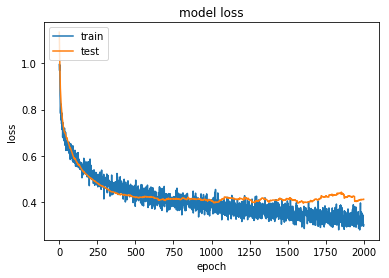

In [17]:
#after running for 1200 epochs it was noticed that the minimum test loss occured at 400 epcohs so I decided to do Early stopping


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

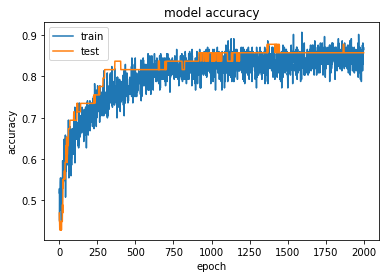

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
test_preds_dnn = model.predict(test_X)
for val in range(len(test_preds_dnn)):
    if test_preds_dnn[val]>0.5:
        test_preds_dnn[val]=1
    else:
        test_preds_dnn[val]=0
        
test_acc_dnn = accuracy_score(test_y,test_preds_dnn)
print(test_acc_dnn)

0.8852459016393442


In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[22  3]
 [ 4 32]]


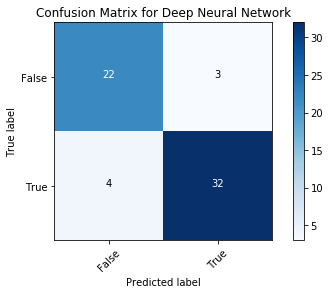

In [21]:
from sklearn.metrics import confusion_matrix
import itertools

cm1 = confusion_matrix(test_y, test_preds_dnn)
cm_plot_labels = ['False','True']
plot_confusion_matrix(cm1, cm_plot_labels, title='Confusion Matrix for Deep Neural Network')

Confusion matrix, without normalization
[[22  3]
 [ 6 30]]


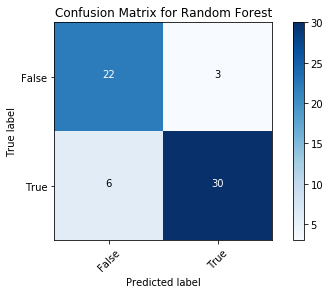

In [22]:
cm2 = confusion_matrix(test_y, test_preds)
cm_plot_labels = ['False','True']
plot_confusion_matrix(cm2, cm_plot_labels, title='Confusion Matrix for Random Forest')

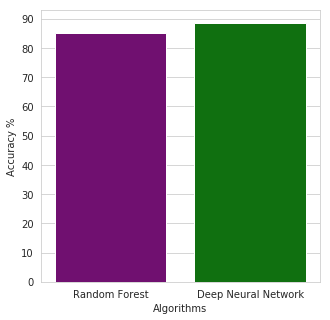

In [23]:
import seaborn as sns

methods = ["Random Forest","Deep Neural Network"]
accuracy = [test_acc*100,test_acc_dnn*100]
colors = ["purple", "green"]

sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

Random Forest Accuracy = 85.24% 



Deep Neural Network Accuracy = 88.52%